In [17]:
import os
import numpy as np
import matplotlib
import torch
# !pip install mat73
# import mat73
import matplotlib.pyplot as plt
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from torchvision import transforms, utils
import time
import pandas as pd
import scipy.io
import sklearn.metrics
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

from scipy import signal

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import LeaveOneGroupOut






In [18]:
class Net2_stft(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
        n5=50
        n_l1=7200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

class Net2_stft2(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft2,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
    
        n_l1=3200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x


class Net2_cwt(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_cwt,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 100
        n3 = 50
        n4 = 50
       
 
        n_l1=4200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, (5, 3),2)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, (5, 3),2)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, (5, 2))
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, (5, 2))
        self.bn4 = nn.BatchNorm2d(n4)
        # self.conv5 = nn.Conv2d(n4, n5, 2)
        # self.bn5 = nn.BatchNorm2d(n5)
     
        
        self.fc1 = nn.Linear(n_l1, n_l2)
       
   
        self.fc2 = nn.Linear(n_l2, num_classes)
      
        


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

# 1D CNN
class Net(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net,self).__init__()
        
        n1 = 128 # This directly affects accuracy if value is low.
        n2 = 128
        n3 = 64
        n4 = 64
        
        n_l1=4544
        n_l2=200
       
        n_out =8   # output channel  (classification)
        oc = 2
        self.conv1 = nn.Conv1d(in_channels, n1, 100, 4)
        self.bn1 = nn.BatchNorm1d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(n1, n2, 25,2)
        self.bn2 = nn.BatchNorm1d(n2)
        self.conv3 = nn.Conv1d(n2, n3, 5,2)
        self.bn3 = nn.BatchNorm1d(n3)
        self.conv4 = nn.Conv1d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm1d(n4)
        # self.conv5 = nn.Conv1d(n4, n5, 2,2)
        # self.bn5 = nn.BatchNorm1d(n5)
        #self.pool1=nn.AvgPool1d(2)
        #self.pool2=nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
        


    def forward(self, x):
    
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

In [19]:


def plotfigFullClass(cm,acc,tle,ExpVer):

    parent_dir = r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/result/"+"/CNN/"
    path1 = os.path.join(parent_dir, 'cm_fig')
    os.makedirs(path1, exist_ok = True) 
    path1 = os.path.join(parent_dir, 'npyFile')
    os.makedirs(path1, exist_ok = True) 



    labelNum=str(1)  #labelling method 1,2,3,4
    size=15
    name1=["R", "G","Gx2","P1","P1x2","P2","P2x2","P23","P23x2","P4","P4x2","sG","sF","sP1","sP2","sP23","sP4","U","Ux2","D","Dx2","sU","sD"]
    name2=name1
    w=20 #fig size 1      change when label num change
    h=22   #fig size 2
    
    # true_num=0
    # for i in range (len(cm)):
    #   true_num=true_num+ cm[i,i]
    # acc=true_num/np.sum(cm)   
    
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=1.2)
    mask = np.zeros_like(df_cm)
    mask[np.where(cm==0)] = True
    
    sn.heatmap(df_cm, cmap="YlGnBu",fmt=".2f",vmin=0, vmax=1.0,annot=True,mask=mask,square=True,cbar=False,annot_kws={"size": size,'weight':'bold'})
     

    s01=' Acc={n:.3f}'.format(n=acc)
    #plt.text(a,b,s01,fontsize=size)
    
    tleSave=tle
    plt.title(tle+s01)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    
    plt.savefig(parent_dir+r"cm_fig/"+tleSave+"CM.png", dpi=300)




In [20]:
# in_ch: CNN input channel number 
# num_class: classification number  8,5,3 
# opt CV method. groupKfold: kfold, all cases not been seen in training set  
# Kfold : randomly kfold. label and cases equally distributed
# group: leave one case out 

from google.colab import drive
drive.mount('/content/drive')
def kFCV(X_all,y_all,in_ch,num_class,opt,case):


   
   
    cm_all=[]
    acc_all=[]
    y_test_all=[]
    y_p_all=[]
    test_ind_all=[]
    
    case=case.flatten()
    idx=[]
   
    if opt['method']=='groupKfold':
        folds=StratifiedGroupKFold(n_splits=k).split(X_all,y_all,case)
    if opt['method']=='Kfold':
        folds=RepeatedStratifiedKFold(n_splits=k, n_repeats=1,random_state=0).split(X_all,y_all)
    if opt['method']=='group':  
        logo = LeaveOneGroupOut()
        logo.get_n_splits(X_all,y_all,case)
        logo.get_n_splits(groups=case) 
        folds=logo.split(X_all,y_all,case)

    for train_ind, test_ind in folds:
           
       
        X_train=X_all[train_ind] 
        X_test=X_all[test_ind]
        y_train=y_all[train_ind] 
        y_test=y_all[test_ind]
        #print(train_ind,test_ind)
        

        for i in range(len(test_ind)):
            test_ind_all.append(test_ind[i])
           

        (unique, counts) = np.unique(case[test_ind], return_counts=True)
        frequencies = np.asarray((unique, counts)).T
        print(frequencies)

        batchsize_train = 16
        train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
        batchsize_test = 16
        test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
                
        
        n_epoch=20
        #n_epoch=25
        learning_rate = 1e-4  #学习的速率 越小越精细
        momentum = 0.1
        random_seed=1
        torch.backends.cudnn.enabled = False
        torch.manual_seed(random_seed)     #设定随机数种子为固定值
        
        train_loss_epoch = []
        test_acc_epoch =[]
        total_acc_epoch = []
        #epoch_range = np.arange(25,225,25)
        epoch_range = np.array([2])

        
        
        if opt['net']=='stft':
          network = Net2_stft(in_ch,num_class).cuda()
        if opt['net']=='stft2':
          network = Net2_stft2(in_ch,num_class).cuda()
        if opt['net']=='cwt':
          network = Net2_cwt(in_ch,num_class).cuda()
        if opt['net']=='1d':
          network = Net(in_ch,num_class).cuda()
        #training
        optimizer = optim.Adam(network.parameters(), lr=learning_rate)
        
        
        
        #network.train()
        Training_Loss = []
        Test_Loss = []
        start_time = time.time()
        criterion = nn.CrossEntropyLoss()
        for epoch in range(n_epoch):   # loop over the dataset multiple times
            train_loss = 0
            for X, Y in train_loader:
                
                X = X.float().cuda()  
                Y = Y.long().view(-1, ).cuda() 
                current_batchsize = X.shape[0]
                optimizer.zero_grad()
                output = network(X)
                loss = criterion(output,Y)
                train_loss = train_loss + loss.item()
                loss.backward()                     #calculate the gradient decent
                optimizer.step()                    #update the weight
                

            test_loss = 0
            correct = 0
            total = 0
            test_y= []
            test_y_p = []
           
            with torch.no_grad():        
                   
                for X, Y in test_loader:
                    X = torch.Tensor(X).cuda()
                    Y = torch.Tensor(Y).long().view(-1, ).cuda()
                    images, labels = X, Y
                    # calculate outputs by running images through the network
                    outputs = network(images)
                    loss = criterion(outputs,Y)
                    test_loss = test_loss + loss.item()

                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    
                    for i in range(len(labels)):
                      test_y.append(labels[i])
                      test_y_p.append(predicted[i])
                      

            Training_Loss.append(train_loss/len(train_loader.dataset))
            Test_Loss.append(test_loss/len(test_loader.dataset))
            # if epoch%(n_epoch-1)==0:
            #     print(train_loss/len(train_loader.dataset))
            #     print(test_loss/len(test_loader.dataset))
      
        train_loss_epoch.append(Training_Loss[-1])
        test_y_p=torch.FloatTensor(test_y_p)
        test_y=torch.FloatTensor(test_y)
     
        y_p=np.array(test_y_p.cpu())
        y=np.array(test_y.cpu())
        

        cm=confusion_matrix(y, y_p)
        acc=accuracy_score(y, y_p)
        
        cm_all.append(cm)
        acc_all.append(acc)
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        print(acc) 


    acc_all=np.array(acc_all)
    cm_all=np.array(cm_all)
    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))
    
    test_ind_all=np.array(test_ind_all)

    cm=confusion_matrix(y_test_all, y_p_all)
    cm_norm=confusion_matrix(y_test_all, y_p_all,normalize='true')

    acc=accuracy_score(y_test_all, y_p_all)
    


    print(acc) 
    print(cm)

    return cm_norm,cm,cm_all,acc,acc_all,y,test_ind_all

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
in_ch=48
channel=np.linspace(0,47,48).astype(int) 
num_class=23
k=7

def main_CV(ExpVer,m):

  ## import individual dataset for personal model
    file_name_data=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/data_all_multi6_filt_0.1_5.npz"
    data=np.load(file_name_data)
    feature_2d_stft=data['feature_2d_stft']
    feature_2d_stft2=data['feature_2d_stft2']
    feature_2d_cwt=data['feature_2d_cwt']
    feature_2d_cwt2=data['feature_2d_cwt2']
    feature_2d_cwt3=data['feature_2d_cwt3']

    label_all=data['label_all']
    caseNum_all=data['caseNum_all']

    
    opt1={'method':m,'net':'stft'}
    opt2={'method':m,'net':'stft2'}
    opt3={'method':m,'net':'cwt'}
    opt4={'method':m,'net':'1d'}

    opt_list=[opt1,opt2,opt3,opt3,opt3]

  
    n_re=1
    cm=[]
    cm_norm=[]
    cm_all=[]
    acc=[]
    acc_all=[]
    y=[]
    test_ind_all=[]
    feature_list=[feature_2d_stft,feature_2d_stft2[:,:,:40,:40],feature_2d_cwt,feature_2d_cwt2,feature_2d_cwt3]
    feature_listName=["stft","stft2","cwt","cwt2","cwt3"]
    print(caseNum_all.shape)
    if __name__ == '__main__':
      
        for i in range(5):
  
          
          cm_norm_temp,cm_temp,cm_all_temp,acc_temp,acc_all_temp,y_temp,test_ind_all_temp=kFCV(feature_list[i][:,channel,:,:],label_all,\
                                                                                               in_ch,num_class,opt_list[i],caseNum_all)
          print(feature_listName[i])
          cm_norm.append(cm_norm_temp)
          cm.append(cm_temp)
          cm_all.append(cm_all_temp)
          acc.append(acc_temp)
          acc_all.append(acc_all_temp)
          y.append(y_temp)
          test_ind_all.append(test_ind_all_temp)



    y_en=np.zeros([np.size(y[0],axis=1),])
    for i in range(np.size(y[0],axis=1)):
      
      y_pred_all=[y[0][1,i],y[1][1,i],y[2][1,i],y[3][1,i],y[4][1,i]]
      (unique, counts) = np.unique(y_pred_all, return_counts=True)

      label=unique[np.argmax(counts)]
      y_en[i]=label
    cm_en=confusion_matrix(y[0][0,:], y_en)
    acc_en=accuracy_score(y[0][0,:], y_en)
    cm_norm_en=confusion_matrix(y[0][0,:], y_en,normalize='true')

    y_max=y[np.argmax(acc)]
    acc_max=acc[np.argmax(acc)]
    cm_max=cm[np.argmax(acc)]
    cm_norm_max=cm_norm[np.argmax(acc)]


    SaveName='ch'+str(in_ch)+'_'+str(k)+m
  
    model='CNN_'
    plotfigFullClass(cm_norm[3],acc[3],model+SaveName+'_cw2',ExpVer)
    plotfigFullClass(cm_norm[4],acc[4],model+SaveName+'_cw3',ExpVer)
    plotfigFullClass(cm_norm_max,acc_max,model+SaveName+'_max',ExpVer)
    plotfigFullClass(cm_norm_en,acc_en,model+SaveName+'_ensemble5',ExpVer)
    np.savez_compressed(r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+r"/result/CNN/npyFile/"+model+SaveName+"_ensemble5.npz",\
                    cm_norm=cm_norm,cm=cm,cm_all=cm_all,acc=acc,acc_all=acc_all,y=y,test_ind_all=test_ind_all,\
                    y_en=y_en,acc_en=acc_en,cm_en=cm_en,cm_norm_en=cm_norm_en,\
                    y_max=y_max,acc_max=acc_max,cm_max=cm_max,cm_norm_max=cm_norm_max,\
                   max_FeatVer=np.argmax(acc))

m1='Kfold'
m2='groupKfold'
m3='group'

ExpVer_list=['2_5','2_9','2_10','2_11','2_13','2_14','2_15','2_17']  # multi_participant dataset per8 
#del_case_list=[[],[],[],[],[],[6],[],[10]]  # delete case multi_participant dataset per8 
#ExpVer_list=['2_1','2_16','2_19']   # sensor variation self -CV 


for i in range(8):
  main_CV(ExpVer_list[i],m1)
for i in range(8):
  main_CV(ExpVer_list[i],m2)




Output hidden; open in https://colab.research.google.com to view.

[[ 1.  7.]
 [ 2.  8.]
 [ 3.  5.]
 [ 4.  9.]
 [ 5.  5.]
 [ 6.  9.]
 [ 7.  9.]
 [ 8.  6.]
 [ 9.  7.]
 [10.  5.]
 [11. 11.]
 [12. 12.]]
0.9139784946236559
[[ 1.  7.]
 [ 2.  7.]
 [ 3.  9.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6.  9.]
 [ 7.  6.]
 [ 8.  4.]
 [ 9.  9.]
 [10.  6.]
 [11. 12.]
 [12.  5.]]
0.9239130434782609
[[ 1.  8.]
 [ 2.  6.]
 [ 3.  2.]
 [ 4. 12.]
 [ 5.  8.]
 [ 6.  7.]
 [ 7. 11.]
 [ 8.  8.]
 [ 9.  6.]
 [10.  7.]
 [11.  7.]
 [12. 10.]]
0.9782608695652174
[[ 1.  8.]
 [ 2.  7.]
 [ 3.  7.]
 [ 4.  8.]
 [ 5.  8.]
 [ 6.  7.]
 [ 7.  5.]
 [ 8. 12.]
 [ 9.  8.]
 [10.  9.]
 [11.  4.]
 [12.  9.]]
0.9347826086956522
[[ 1.  7.]
 [ 2. 12.]
 [ 3.  8.]
 [ 4.  2.]
 [ 5.  8.]
 [ 6.  8.]
 [ 7.  6.]
 [ 8.  8.]
 [ 9.  8.]
 [10.  9.]
 [11.  8.]
 [12.  8.]]
0.9565217391304348
[[ 1.  9.]
 [ 2.  8.]
 [ 3. 14.]
 [ 4.  4.]
 [ 5.  6.]
 [ 6. 11.]
 [ 7.  3.]
 [ 8.  7.]
 [ 9. 11.]
 [10.  9.]
 [11.  5.]
 [12.  5.]]
0.9782608695652174
[[ 1.  7.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4. 10.]
 [ 5.  7.]
 [ 6.  2.]
 [ 7. 13.]
 [ 8.  8.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  4.]
 [ 2.  9.]
 [ 3.  6.]
 [ 4.  9.]
 [ 5.  3.]
 [ 6.  8.]
 [ 7. 10.]
 [ 8.  6.]
 [ 9. 10.]
 [10. 10.]
 [11.  8.]
 [12.  8.]
 [13. 13.]
 [14.  5.]
 [15.  7.]]
0.8448275862068966
[[ 1. 11.]
 [ 2. 10.]
 [ 3.  6.]
 [ 4.  7.]
 [ 5.  6.]
 [ 6.  5.]
 [ 7.  7.]
 [ 8.  6.]
 [ 9.  9.]
 [10.  9.]
 [11.  7.]
 [12.  9.]
 [13. 10.]
 [14.  9.]
 [15.  5.]]
0.8275862068965517
[[ 1. 11.]
 [ 2.  7.]
 [ 3.  6.]
 [ 4.  7.]
 [ 5.  9.]
 [ 6. 10.]
 [ 7.  6.]
 [ 8. 12.]
 [ 9.  5.]
 [10.  3.]
 [11.  8.]
 [12.  8.]
 [13.  9.]
 [14.  8.]
 [15.  7.]]
0.853448275862069
[[ 1.  6.]
 [ 2.  4.]
 [ 3. 15.]
 [ 4.  9.]
 [ 5.  5.]
 [ 6.  9.]
 [ 7.  5.]
 [ 8.  8.]
 [ 9.  6.]
 [10.  8.]
 [11.  9.]
 [12. 10.]
 [13.  6.]
 [14. 10.]
 [15.  6.]]
0.8620689655172413
[[ 1. 10.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4.  7.]
 [ 5. 14.]
 [ 6. 10.]
 [ 7.  5.]
 [ 8.  5.]
 [ 9.  5.]
 [10.  9.]
 [11.  6.]
 [12.  8.]
 [13.  6.]
 [14.  7.]
 [15. 10.]]
0.9130434782608695
[[ 1.  6.]
 [ 2. 10.]
 [ 3.  8.]
 [ 4.  2.]
 [ 5.  6.]
 [ 6.  6.]
 [ 7.  8.]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  7.]
 [ 2.  6.]
 [ 3.  6.]
 [ 4.  7.]
 [ 5.  5.]
 [ 6.  9.]
 [ 7. 10.]
 [ 8.  6.]
 [ 9.  7.]
 [10. 10.]
 [11.  6.]
 [12. 10.]
 [13.  8.]
 [14.  5.]
 [15. 10.]
 [16. 10.]]
0.9016393442622951
[[ 1.  9.]
 [ 2. 10.]
 [ 3.  7.]
 [ 4.  3.]
 [ 5.  3.]
 [ 6.  8.]
 [ 7.  8.]
 [ 8.  8.]
 [ 9.  6.]
 [10. 13.]
 [11.  9.]
 [12.  6.]
 [13.  5.]
 [14.  8.]
 [15.  6.]
 [16. 13.]]
0.9016393442622951
[[ 1.  7.]
 [ 2.  8.]
 [ 3.  7.]
 [ 4.  4.]
 [ 5.  9.]
 [ 6.  9.]
 [ 7.  4.]
 [ 8.  8.]
 [ 9. 10.]
 [10.  7.]
 [11. 12.]
 [12. 11.]
 [13.  6.]
 [14.  6.]
 [15.  8.]
 [16.  6.]]
0.8934426229508197
[[ 1.  5.]
 [ 2.  7.]
 [ 3.  8.]
 [ 4.  9.]
 [ 5. 10.]
 [ 6. 11.]
 [ 7.  8.]
 [ 8.  6.]
 [ 9.  4.]
 [10.  6.]
 [11.  6.]
 [12.  7.]
 [13. 10.]
 [14.  9.]
 [15.  7.]
 [16.  9.]]
0.9016393442622951
[[ 1. 13.]
 [ 2.  6.]
 [ 3.  7.]
 [ 4.  7.]
 [ 5.  9.]
 [ 6.  3.]
 [ 7. 10.]
 [ 8. 10.]
 [ 9.  6.]
 [10.  6.]
 [11. 11.]
 [12.  6.]
 [13.  3.]
 [14. 15.]
 [15.  3.]
 [16.  6.]]
0.8512396694214877
[[ 1.  6.]
 [ 2.  6.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  3.]
 [ 2. 10.]
 [ 3.  5.]
 [ 4.  8.]
 [ 5.  6.]
 [ 6.  8.]
 [ 7.  9.]
 [ 8.  8.]
 [ 9.  7.]
 [10.  9.]
 [11.  7.]
 [12. 11.]
 [13.  8.]
 [14.  7.]
 [15.  8.]]
0.9385964912280702
[[ 1.  6.]
 [ 2. 10.]
 [ 3.  9.]
 [ 4.  8.]
 [ 5.  4.]
 [ 6.  4.]
 [ 7.  8.]
 [ 8.  5.]
 [ 9. 11.]
 [10.  9.]
 [11.  4.]
 [12. 12.]
 [13. 10.]
 [14.  9.]
 [15.  5.]]
0.868421052631579
[[ 1. 13.]
 [ 2.  8.]
 [ 3.  6.]
 [ 4.  7.]
 [ 5.  6.]
 [ 6.  8.]
 [ 7.  8.]
 [ 8. 10.]
 [ 9.  5.]
 [10.  3.]
 [11.  8.]
 [12. 10.]
 [13.  8.]
 [14.  7.]
 [15.  7.]]
0.9210526315789473
[[ 1.  7.]
 [ 2.  5.]
 [ 3.  9.]
 [ 4.  4.]
 [ 5. 10.]
 [ 6.  8.]
 [ 7.  6.]
 [ 8.  9.]
 [ 9.  7.]
 [10.  6.]
 [11. 10.]
 [12.  7.]
 [13. 10.]
 [14.  6.]
 [15.  9.]]
0.8938053097345132
[[ 1.  8.]
 [ 2.  6.]
 [ 3.  4.]
 [ 4.  7.]
 [ 5. 15.]
 [ 6. 10.]
 [ 7.  3.]
 [ 8.  8.]
 [ 9.  5.]
 [10. 10.]
 [11.  8.]
 [12.  5.]
 [13.  7.]
 [14.  8.]
 [15.  9.]]
0.9380530973451328
[[ 1.  6.]
 [ 2.  6.]
 [ 3. 10.]
 [ 4.  5.]
 [ 5.  7.]
 [ 6. 10.]
 [ 7.  6.]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  4.]
 [ 2.  8.]
 [ 3.  9.]
 [ 4.  7.]
 [ 5.  2.]
 [ 6.  6.]
 [ 7.  8.]
 [ 8.  8.]
 [ 9. 14.]
 [10.  4.]
 [11. 12.]
 [12.  7.]
 [13. 10.]]
0.8383838383838383
[[ 1.  9.]
 [ 2. 10.]
 [ 3.  9.]
 [ 4.  7.]
 [ 5.  6.]
 [ 6. 11.]
 [ 7.  7.]
 [ 8.  5.]
 [ 9.  3.]
 [10.  6.]
 [11.  9.]
 [12.  8.]
 [13.  9.]]
0.8484848484848485
[[ 1.  6.]
 [ 2.  3.]
 [ 3.  9.]
 [ 4. 11.]
 [ 5.  6.]
 [ 6. 10.]
 [ 7.  8.]
 [ 8.  8.]
 [ 9.  5.]
 [10.  7.]
 [11.  8.]
 [12.  9.]
 [13.  9.]]
0.7878787878787878
[[ 1.  9.]
 [ 2.  9.]
 [ 3.  9.]
 [ 4.  7.]
 [ 5.  8.]
 [ 6.  6.]
 [ 7.  3.]
 [ 8.  9.]
 [ 9.  6.]
 [10. 12.]
 [11. 10.]
 [12.  4.]
 [13.  7.]]
0.8686868686868687
[[ 1.  8.]
 [ 2.  7.]
 [ 3.  3.]
 [ 4.  7.]
 [ 5. 10.]
 [ 6.  9.]
 [ 7.  8.]
 [ 8.  9.]
 [ 9.  7.]
 [10. 11.]
 [11.  7.]
 [12.  6.]
 [13.  7.]]
0.8484848484848485
[[ 1.  8.]
 [ 2.  9.]
 [ 3. 10.]
 [ 4.  6.]
 [ 5.  9.]
 [ 6.  6.]
 [ 7.  8.]
 [ 8.  7.]
 [ 9.  5.]
 [10.  7.]
 [11.  7.]
 [12. 11.]
 [13.  6.]]
0.8484848484848485
[[ 1.  8.]
 [ 2.  6.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  6.]
 [ 2.  7.]
 [ 3.  9.]
 [ 4.  6.]
 [ 5.  4.]
 [ 6.  5.]
 [ 7.  7.]
 [ 8.  8.]
 [ 9. 13.]
 [10.  5.]
 [11. 11.]
 [12.  7.]
 [13. 11.]]
0.8686868686868687
[[ 1.  8.]
 [ 2. 10.]
 [ 3.  8.]
 [ 4.  7.]
 [ 5.  3.]
 [ 6. 12.]
 [ 7.  9.]
 [ 8.  5.]
 [ 9.  4.]
 [10.  5.]
 [11.  8.]
 [12.  9.]
 [13. 11.]]
0.9494949494949495
[[ 1.  5.]
 [ 2.  3.]
 [ 3.  9.]
 [ 4. 12.]
 [ 5.  5.]
 [ 6.  9.]
 [ 7.  7.]
 [ 8. 11.]
 [ 9.  4.]
 [10.  7.]
 [11. 10.]
 [12.  9.]
 [13.  7.]]
0.8673469387755102
[[ 1.  7.]
 [ 2.  9.]
 [ 3.  8.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6.  6.]
 [ 7.  3.]
 [ 8.  8.]
 [ 9.  7.]
 [10. 13.]
 [11.  7.]
 [12.  6.]
 [13.  6.]]
0.8571428571428571
[[ 1.  8.]
 [ 2.  9.]
 [ 3.  4.]
 [ 4.  7.]
 [ 5.  8.]
 [ 6. 11.]
 [ 7.  7.]
 [ 8.  8.]
 [ 9.  6.]
 [10. 11.]
 [11.  9.]
 [12.  2.]
 [13.  8.]]
0.8673469387755102
[[ 1.  9.]
 [ 2.  9.]
 [ 3. 10.]
 [ 4.  5.]
 [ 5.  9.]
 [ 6.  5.]
 [ 7. 10.]
 [ 8.  7.]
 [ 9.  4.]
 [10.  5.]
 [11.  6.]
 [12. 12.]
 [13.  7.]]
0.9183673469387755
[[ 1.  9.]
 [ 2.  2.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  4.]
 [ 2.  8.]
 [ 3. 10.]
 [ 4.  7.]
 [ 5.  3.]
 [ 6.  5.]
 [ 7.  8.]
 [ 8.  7.]
 [ 9. 13.]
 [10.  4.]
 [11. 11.]
 [12.  9.]
 [13.  9.]]
0.8877551020408163
[[ 1.  9.]
 [ 2. 11.]
 [ 3.  8.]
 [ 4.  4.]
 [ 5.  6.]
 [ 6. 11.]
 [ 7.  6.]
 [ 8.  8.]
 [ 9.  3.]
 [10.  6.]
 [11.  8.]
 [12.  7.]
 [13. 11.]]
0.8571428571428571
[[ 1.  7.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 11.]
 [ 5.  6.]
 [ 6. 11.]
 [ 7.  7.]
 [ 8.  8.]
 [ 9.  3.]
 [10.  6.]
 [11.  9.]
 [12.  8.]
 [13.  9.]]
0.8673469387755102
[[ 1. 10.]
 [ 2.  9.]
 [ 3.  8.]
 [ 4.  9.]
 [ 5.  6.]
 [ 6.  6.]
 [ 7.  3.]
 [ 8.  6.]
 [ 9.  9.]
 [10. 14.]
 [11.  9.]
 [12.  4.]
 [13.  5.]]
0.9081632653061225
[[ 1.  7.]
 [ 2.  5.]
 [ 3.  2.]
 [ 4.  8.]
 [ 5.  8.]
 [ 6.  9.]
 [ 7.  9.]
 [ 8. 11.]
 [ 9.  7.]
 [10.  8.]
 [11.  9.]
 [12.  6.]
 [13.  9.]]
0.8673469387755102
[[ 1.  8.]
 [ 2.  9.]
 [ 3. 10.]
 [ 4.  8.]
 [ 5. 12.]
 [ 6.  4.]
 [ 7. 10.]
 [ 8.  5.]
 [ 9.  1.]
 [10. 10.]
 [11.  5.]
 [12. 10.]
 [13.  5.]]
0.865979381443299
[[ 1.  7.]
 [ 2.  5.]
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[ 1.  4.]
 [ 2.  7.]
 [ 3. 10.]
 [ 4.  6.]
 [ 5.  4.]
 [ 6.  4.]
 [ 7.  9.]
 [ 8.  9.]
 [ 9. 12.]
 [10.  3.]
 [11. 14.]
 [12.  6.]
 [13. 10.]]
0.826530612244898
[[ 1.  9.]
 [ 2.  9.]
 [ 3.  8.]
 [ 4.  8.]
 [ 5.  6.]
 [ 6. 11.]
 [ 7.  5.]
 [ 8.  6.]
 [ 9.  3.]
 [10.  7.]
 [11.  7.]
 [12. 10.]
 [13.  9.]]
0.8877551020408163
[[ 1.  8.]
 [ 2.  4.]
 [ 3. 10.]
 [ 4. 10.]
 [ 5.  3.]
 [ 6. 11.]
 [ 7.  7.]
 [ 8.  8.]
 [ 9.  6.]
 [10.  5.]
 [11. 11.]
 [12.  8.]
 [13.  7.]]
0.8367346938775511
[[ 1.  6.]
 [ 2. 11.]
 [ 3.  7.]
 [ 4.  7.]
 [ 5. 10.]
 [ 6.  4.]
 [ 7.  7.]
 [ 8.  5.]
 [ 9.  9.]
 [10. 13.]
 [11.  6.]
 [12.  5.]
 [13.  8.]]
0.8367346938775511
[[ 1.  6.]
 [ 2.  7.]
 [ 3.  4.]
 [ 4.  7.]
 [ 5.  8.]
 [ 6. 11.]
 [ 7.  7.]
 [ 8. 12.]
 [ 9.  5.]
 [10. 12.]
 [11.  8.]
 [12.  4.]
 [13.  7.]]
0.9183673469387755
[[ 1. 10.]
 [ 2.  8.]
 [ 3.  9.]
 [ 4.  7.]
 [ 5. 11.]
 [ 6.  7.]
 [ 7.  8.]
 [ 8.  5.]
 [ 9.  3.]
 [10.  6.]
 [11.  7.]
 [12.  9.]
 [13.  7.]]
0.8350515463917526
[[ 1.  9.]
 [ 2.  6.]
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


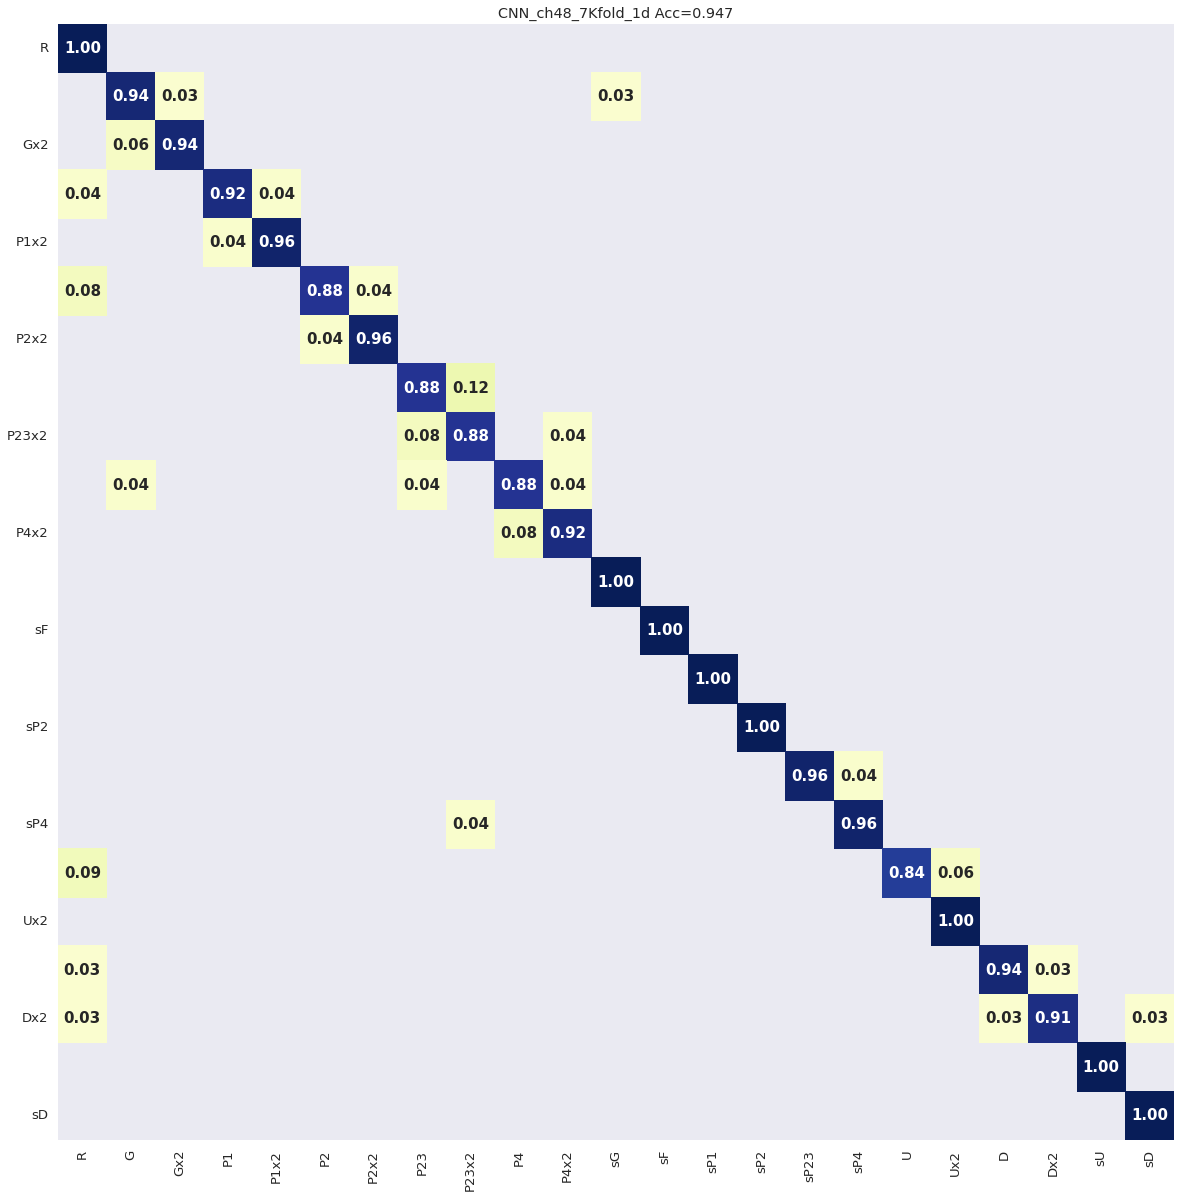

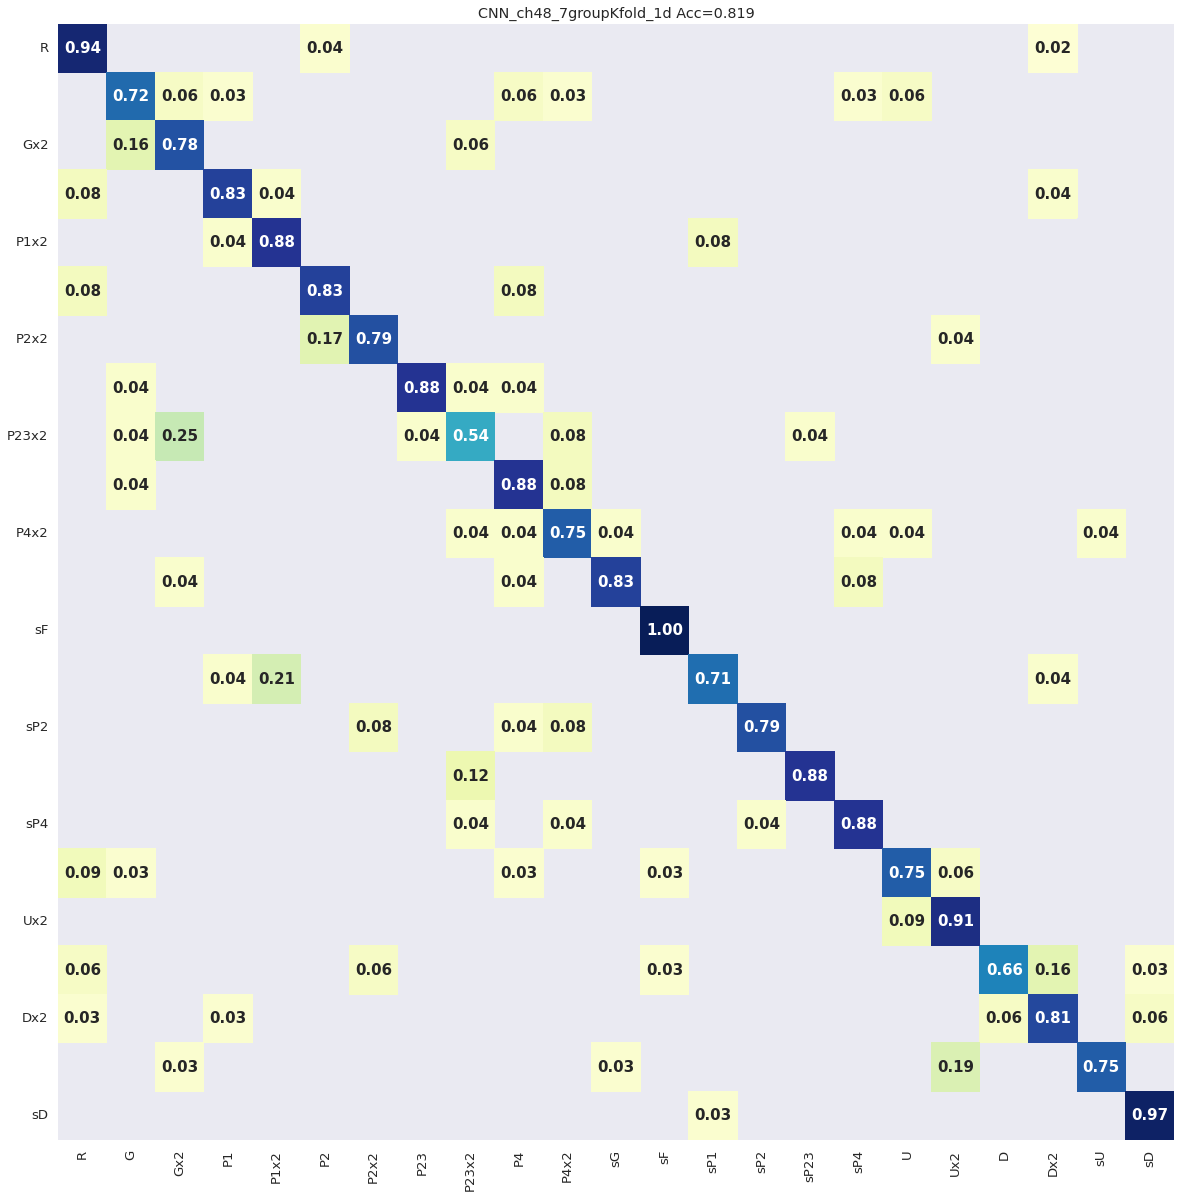

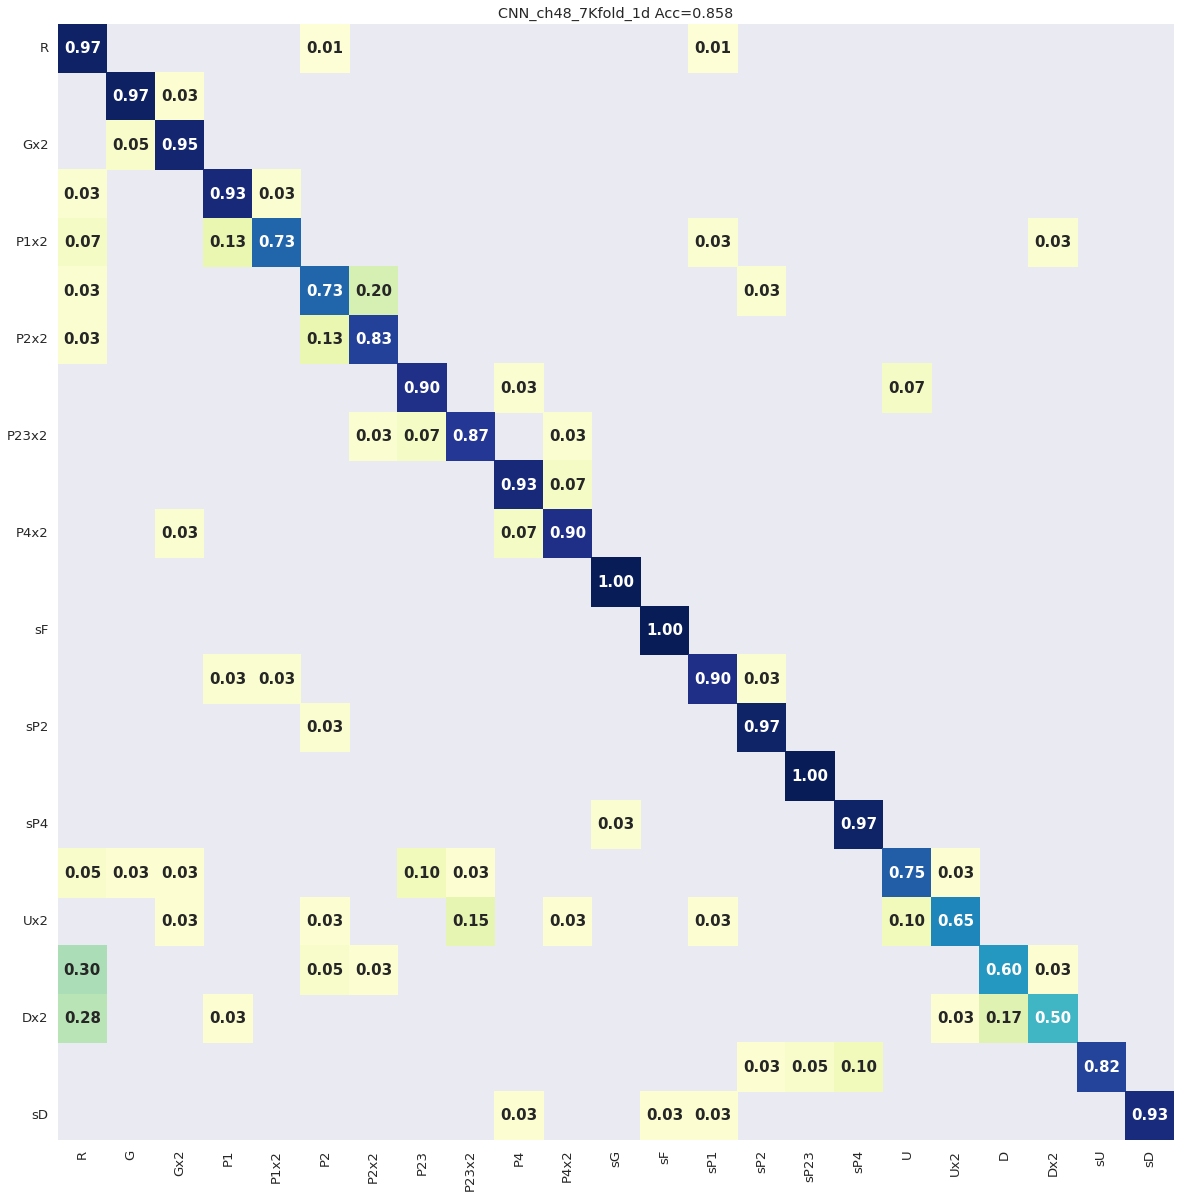

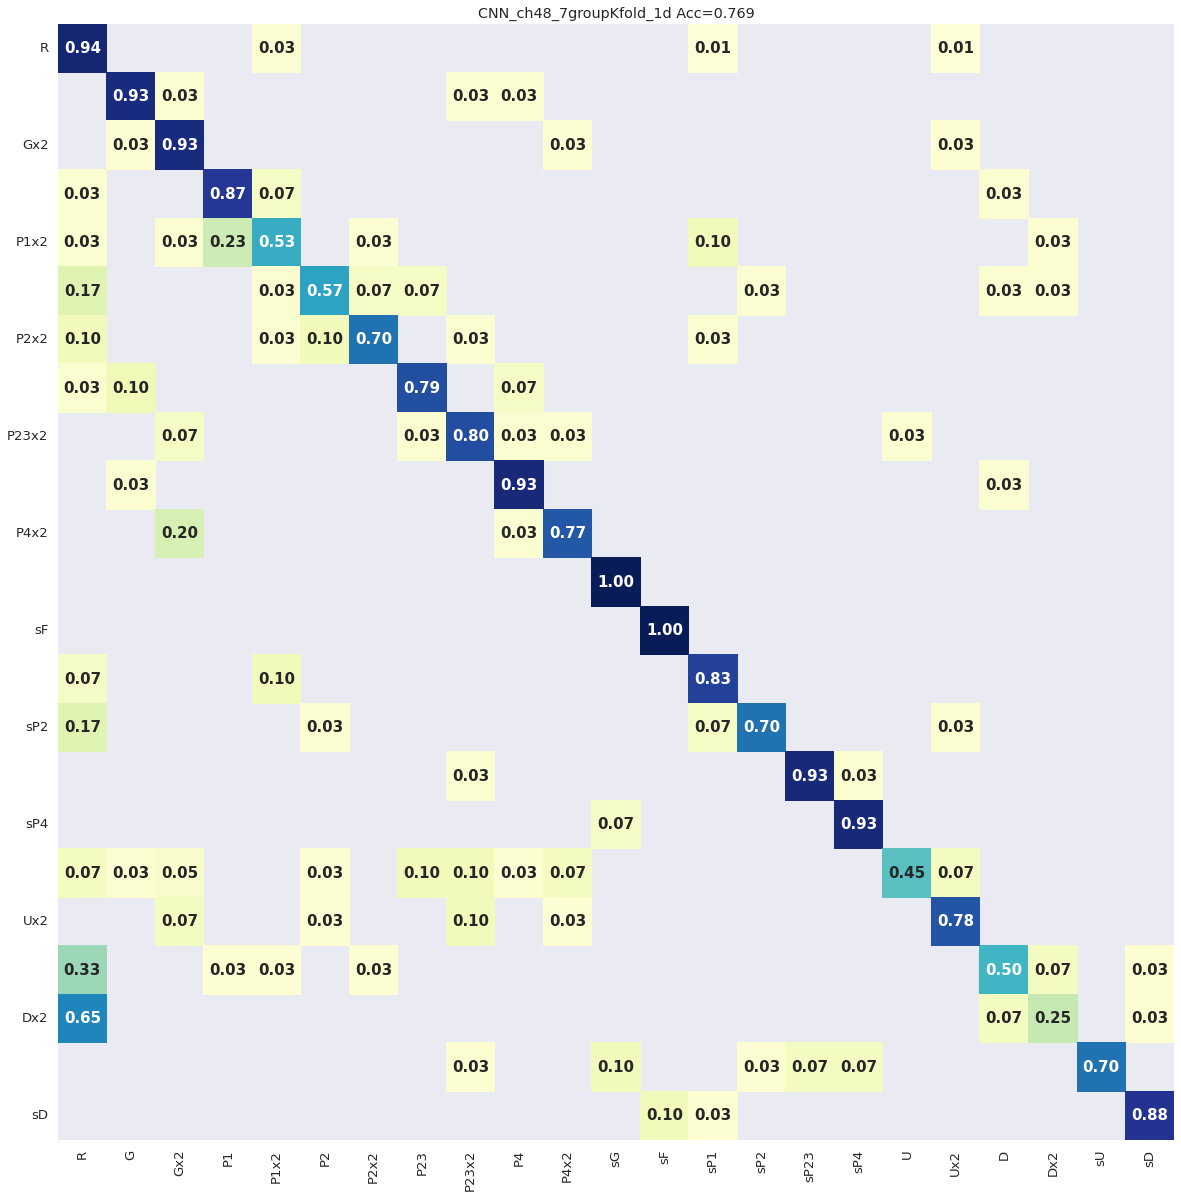

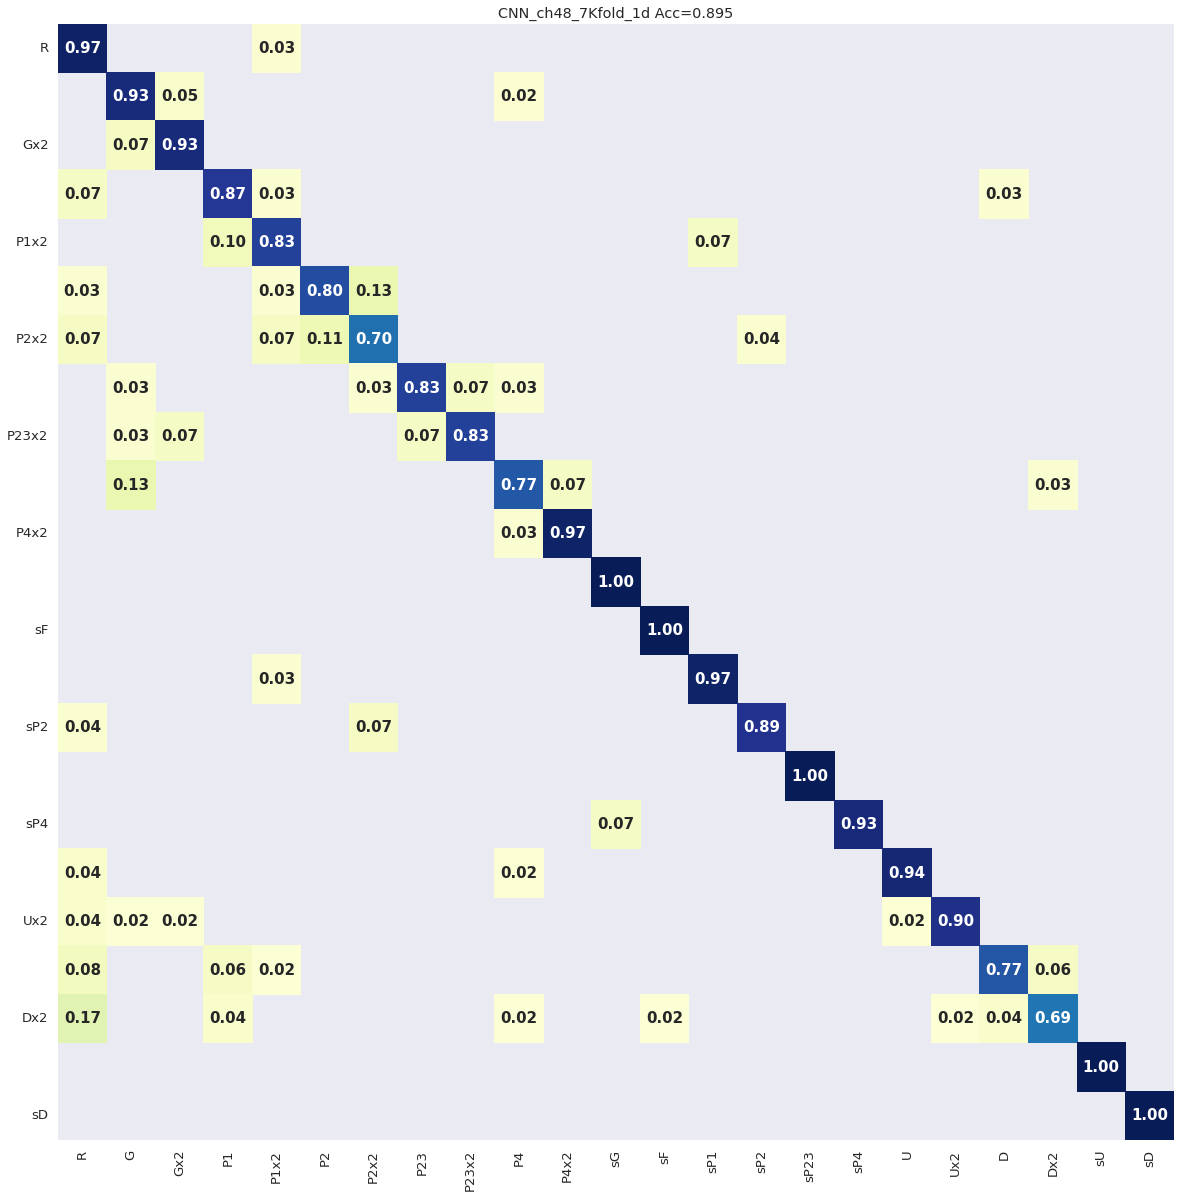

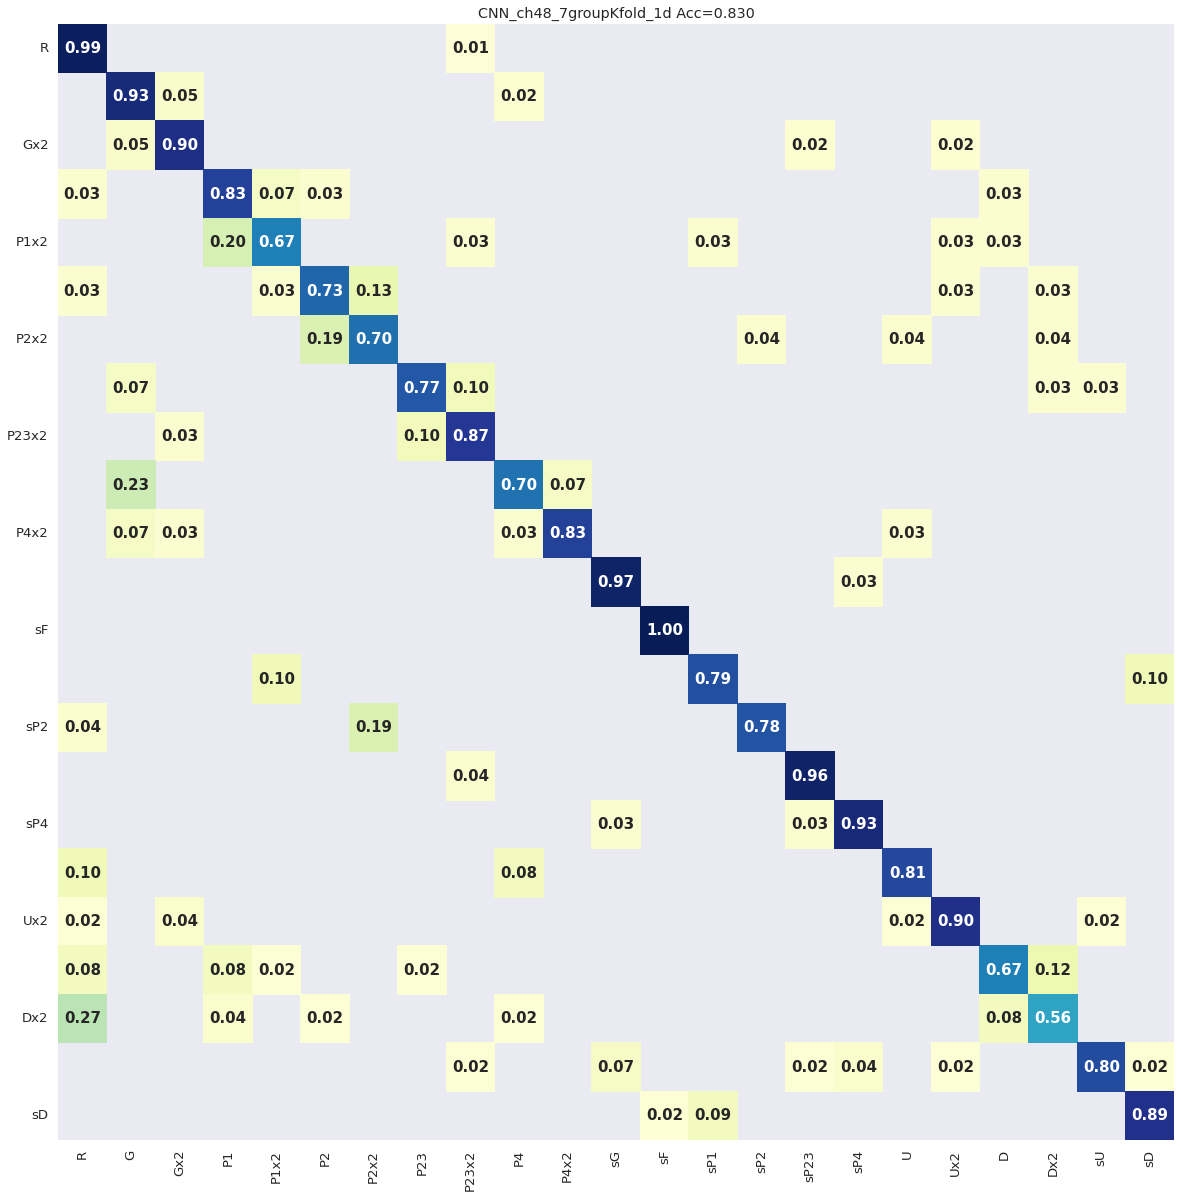

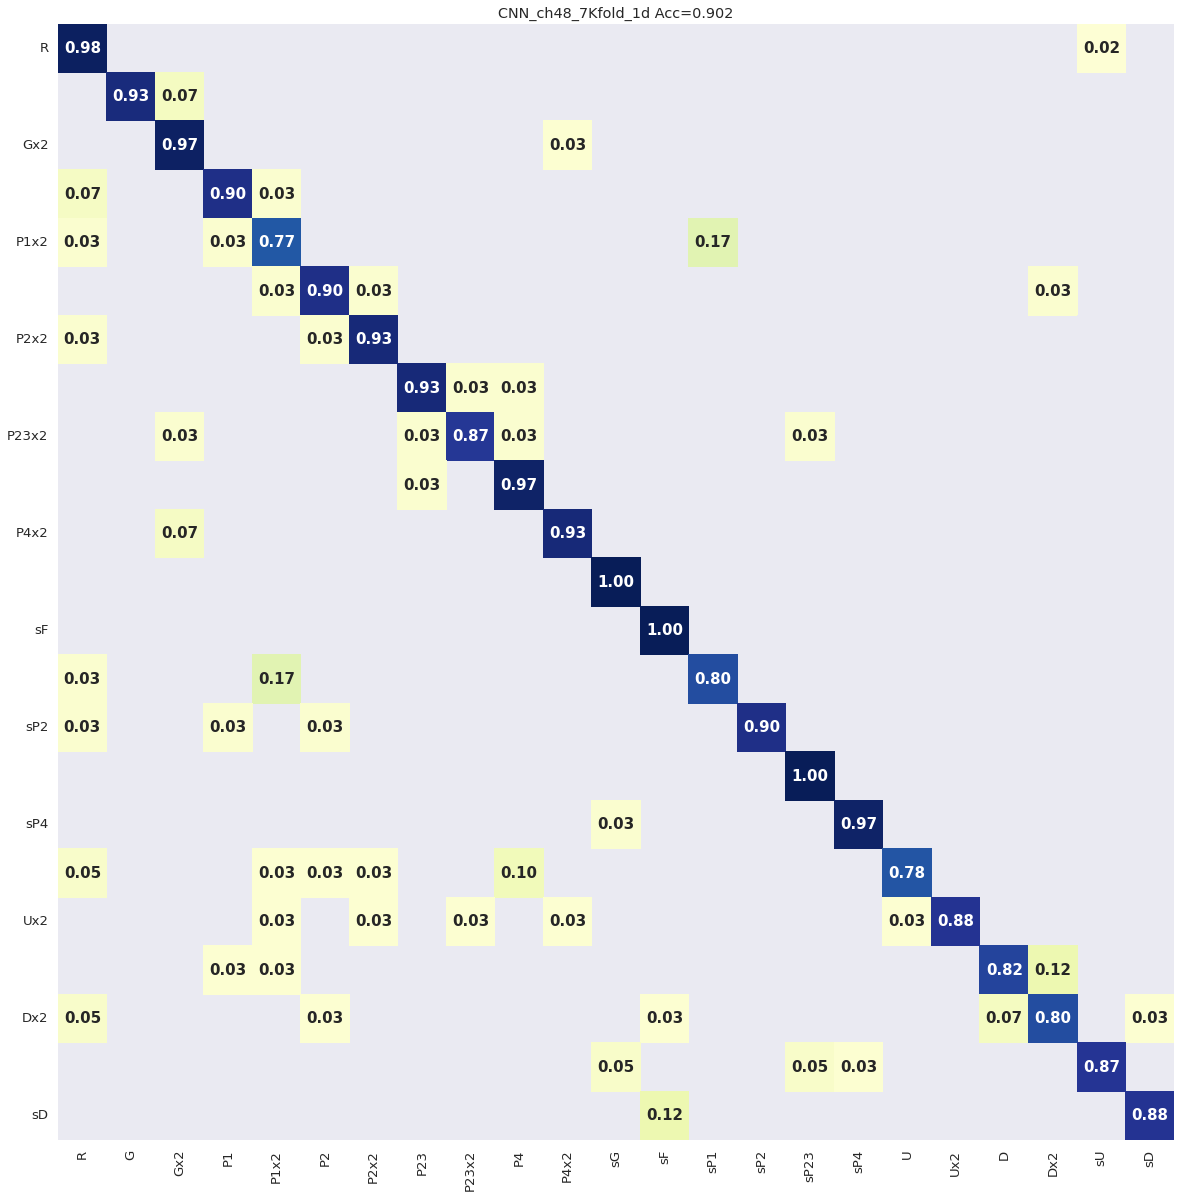

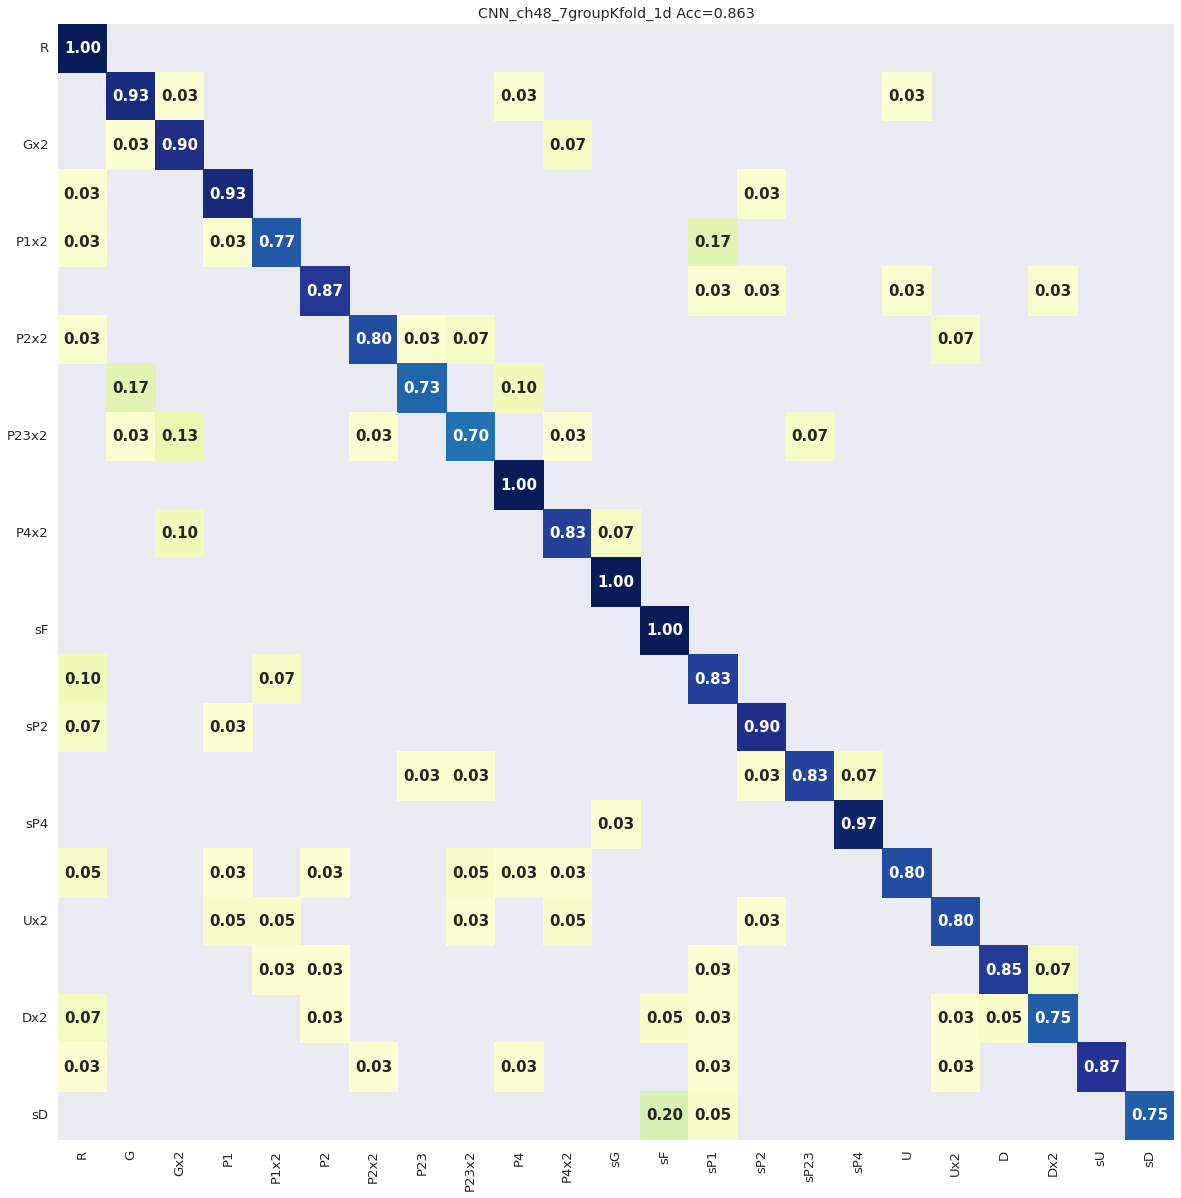

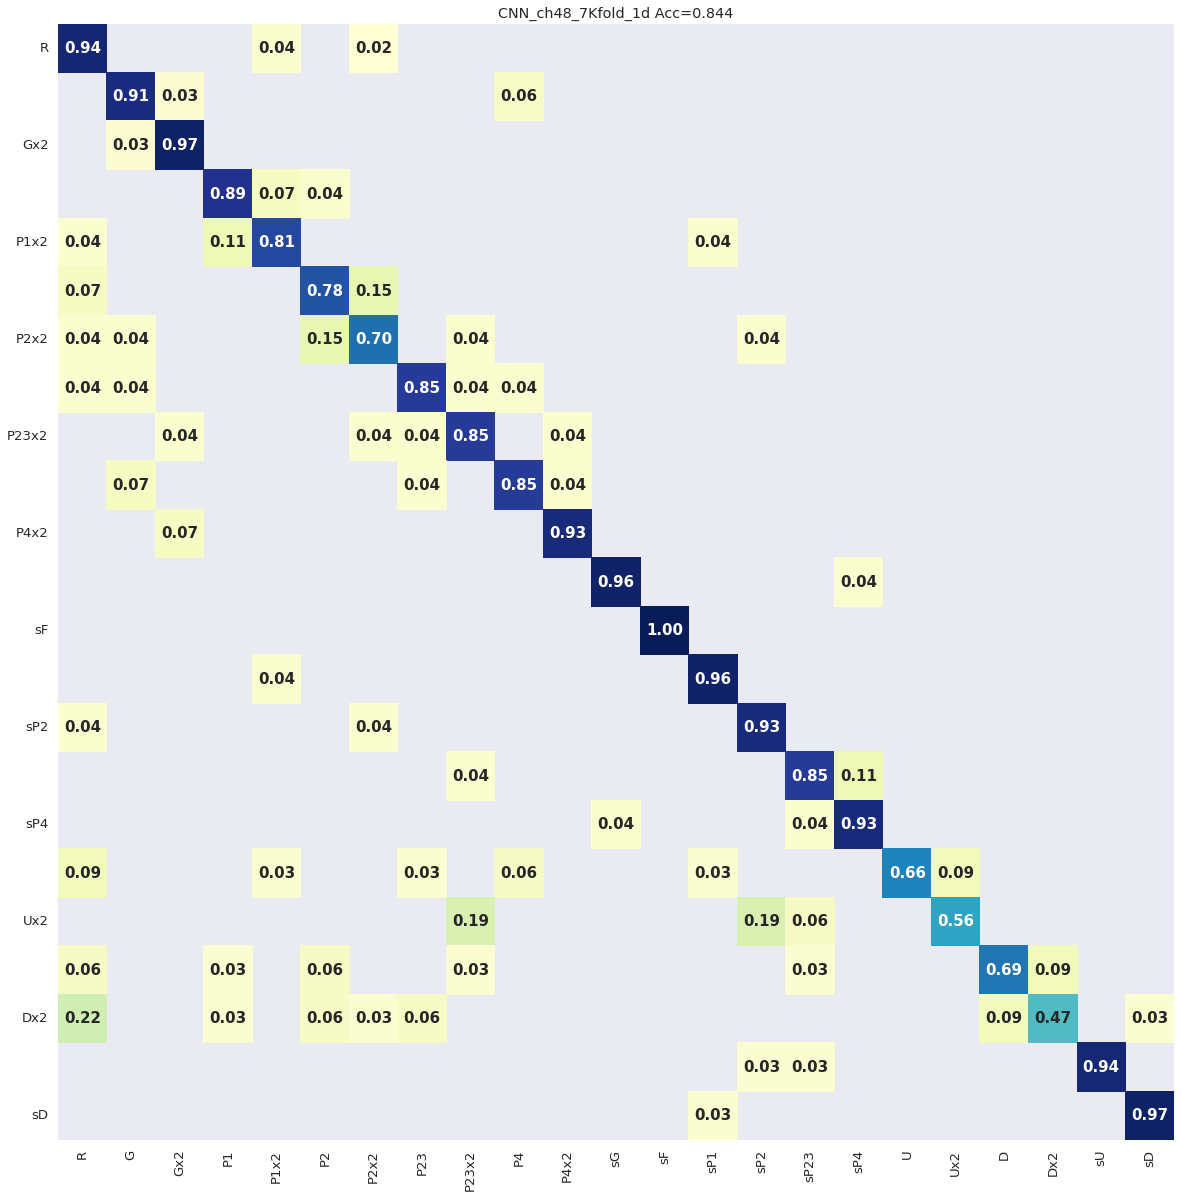

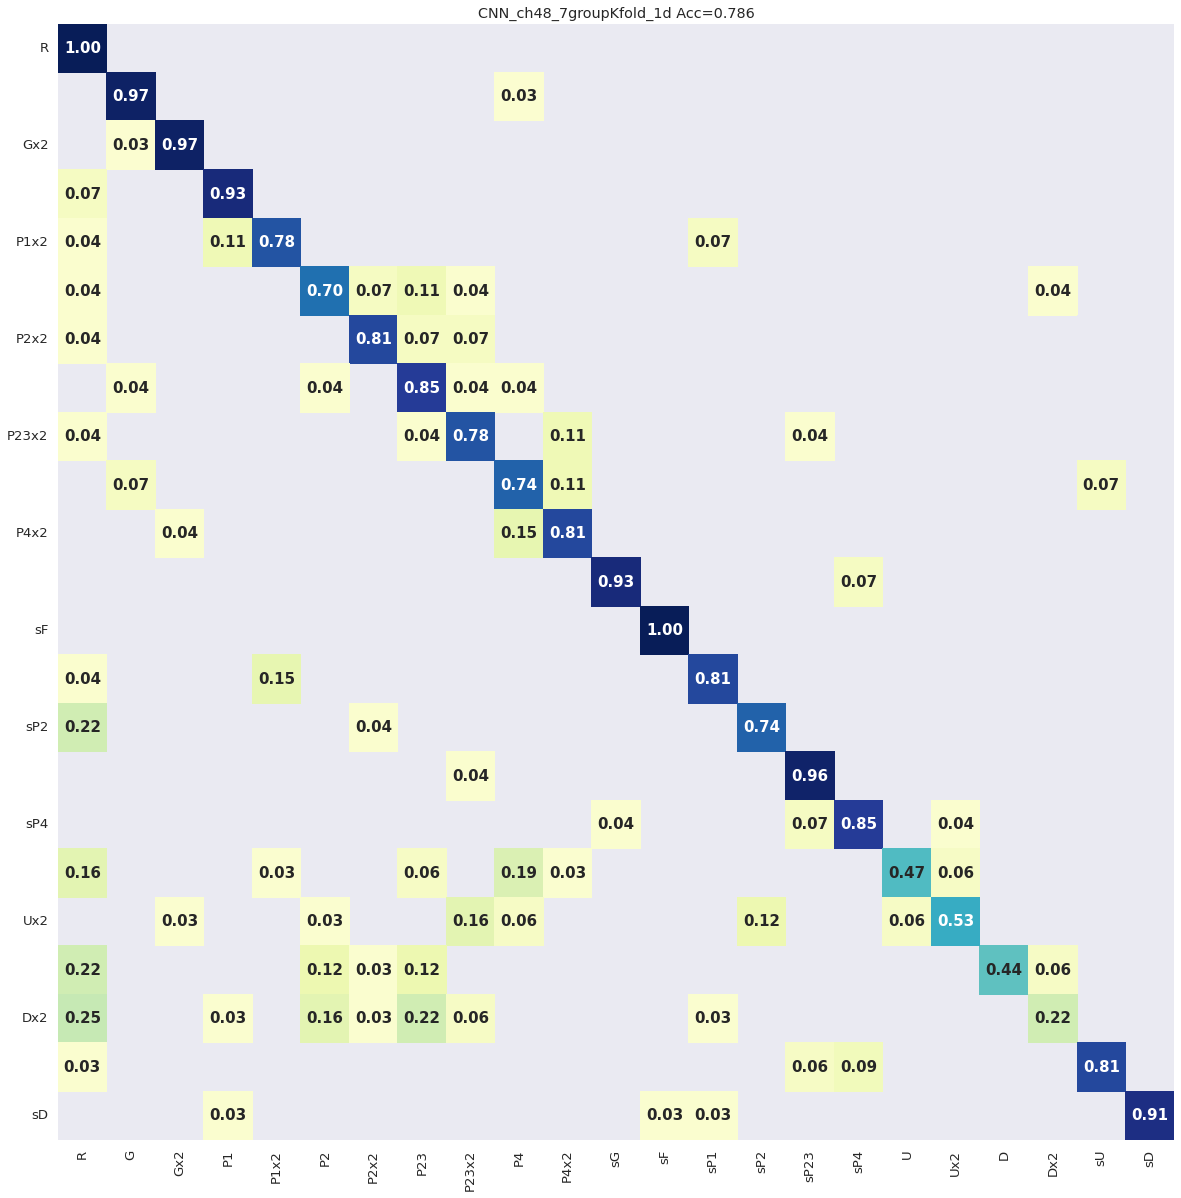

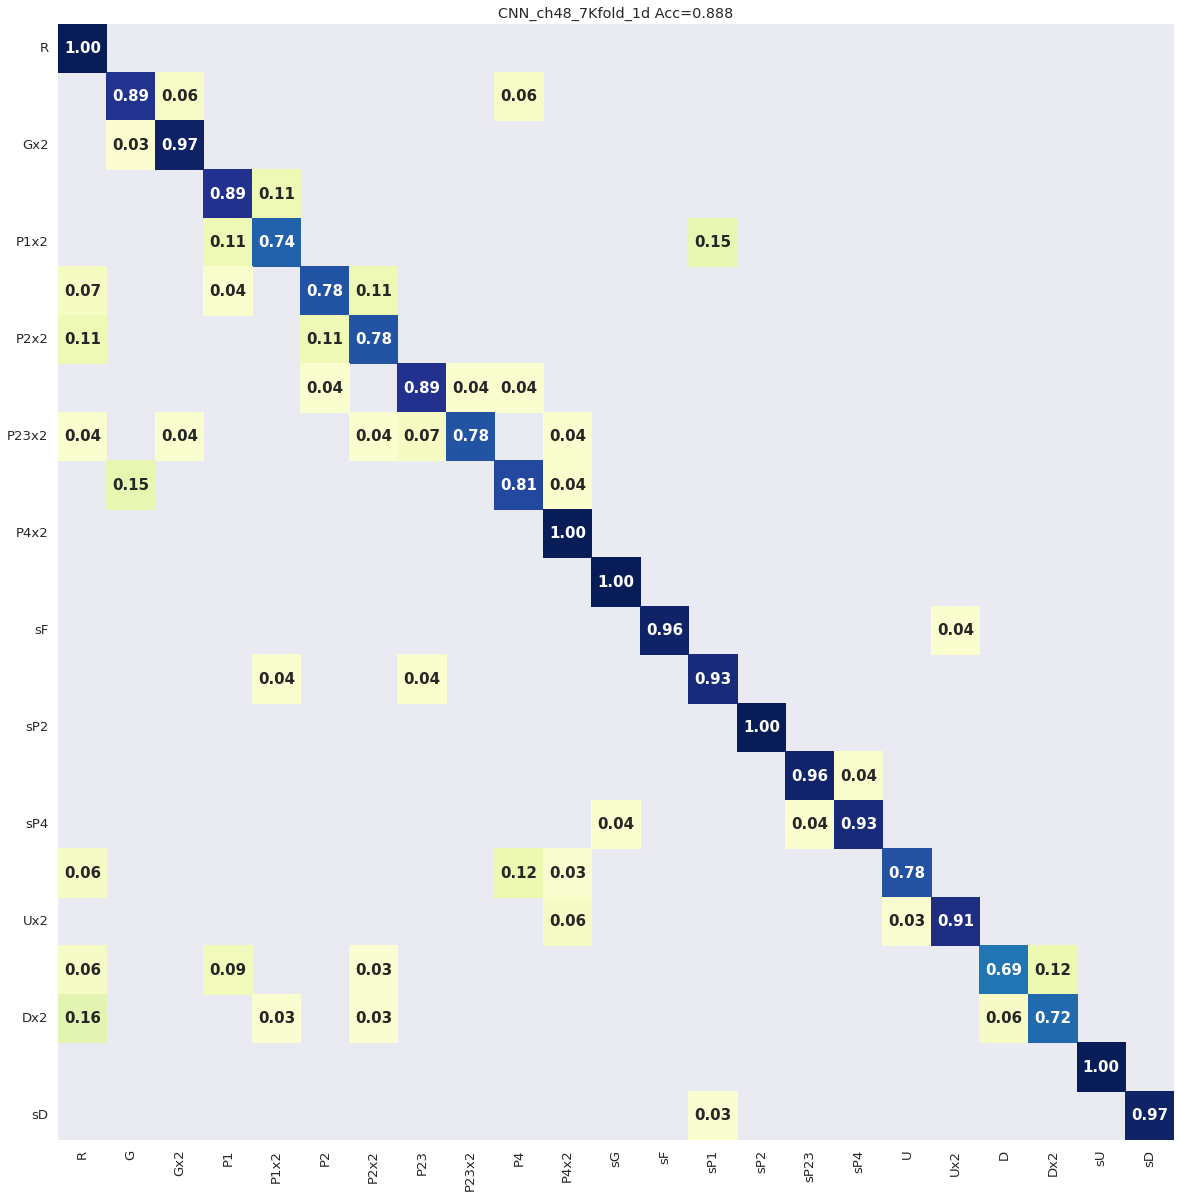

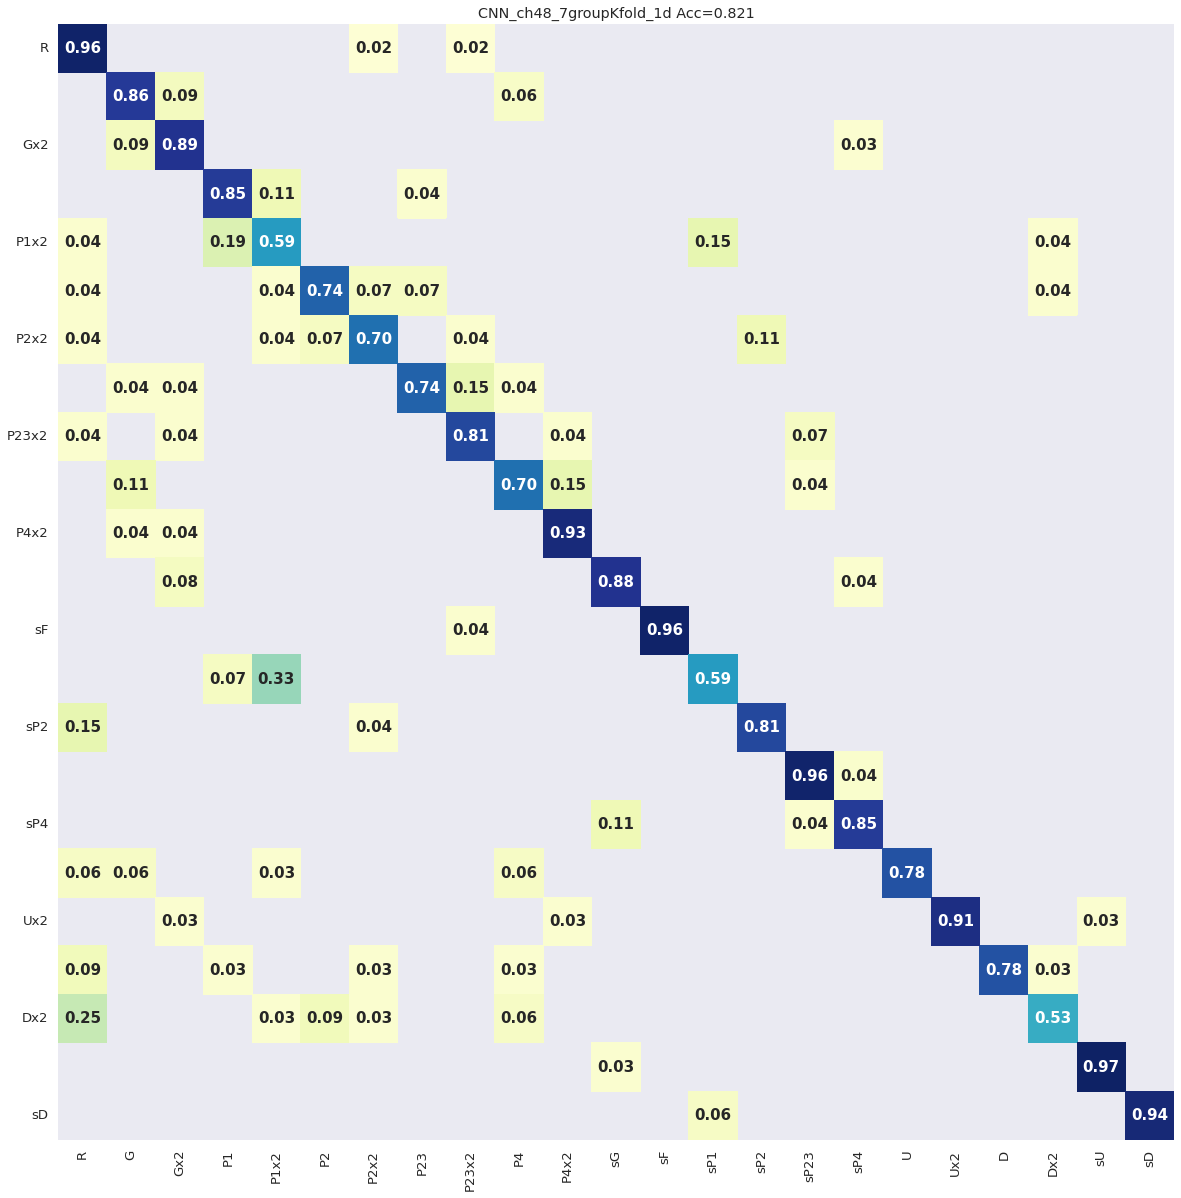

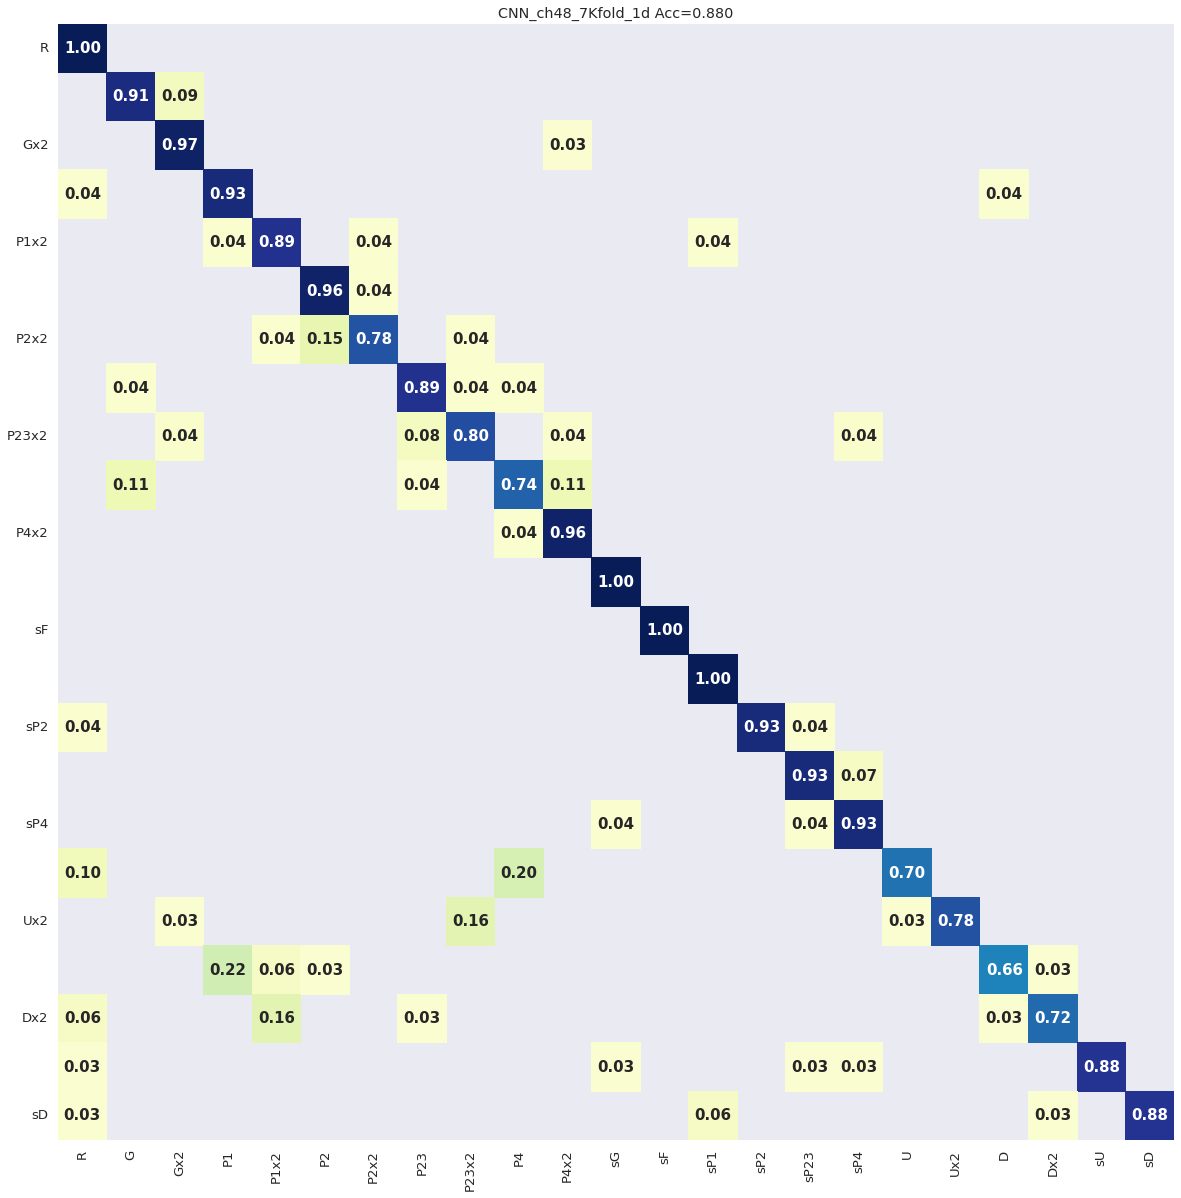

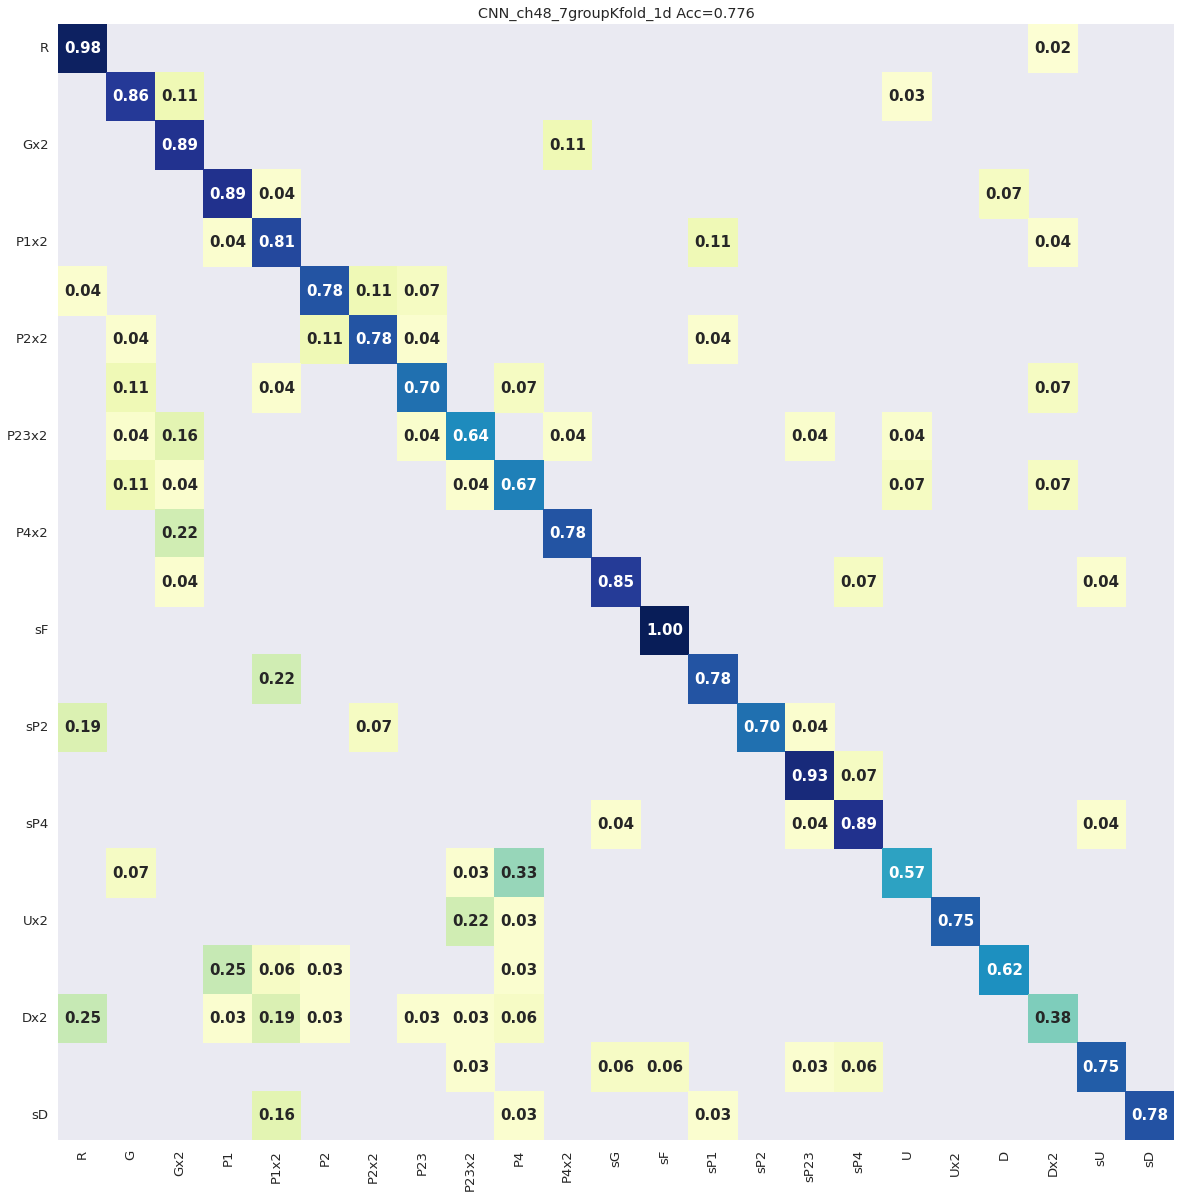

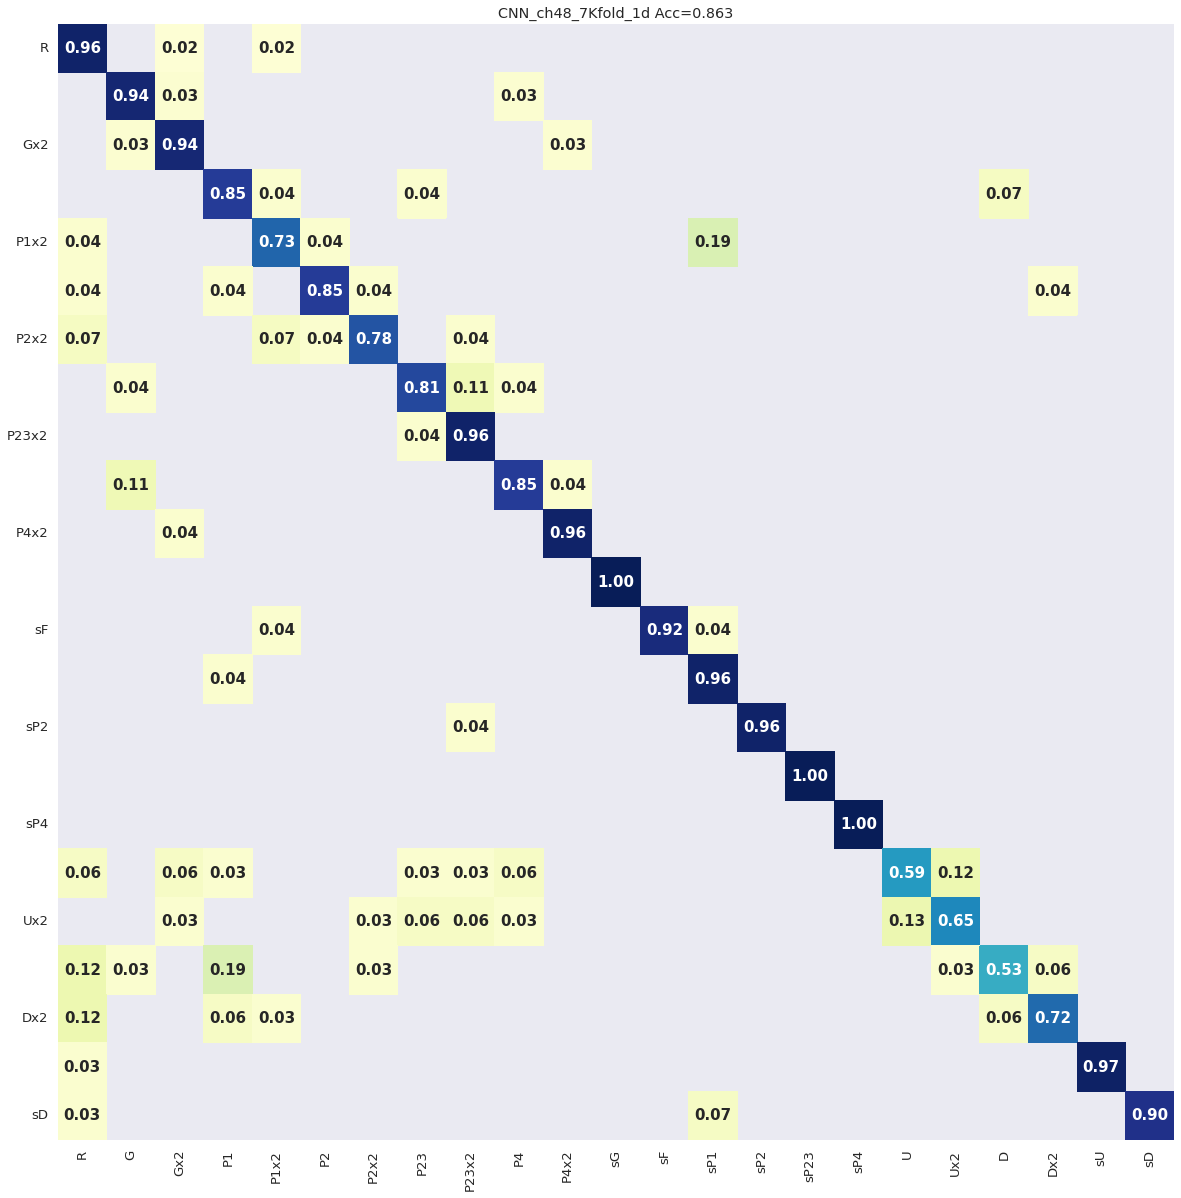

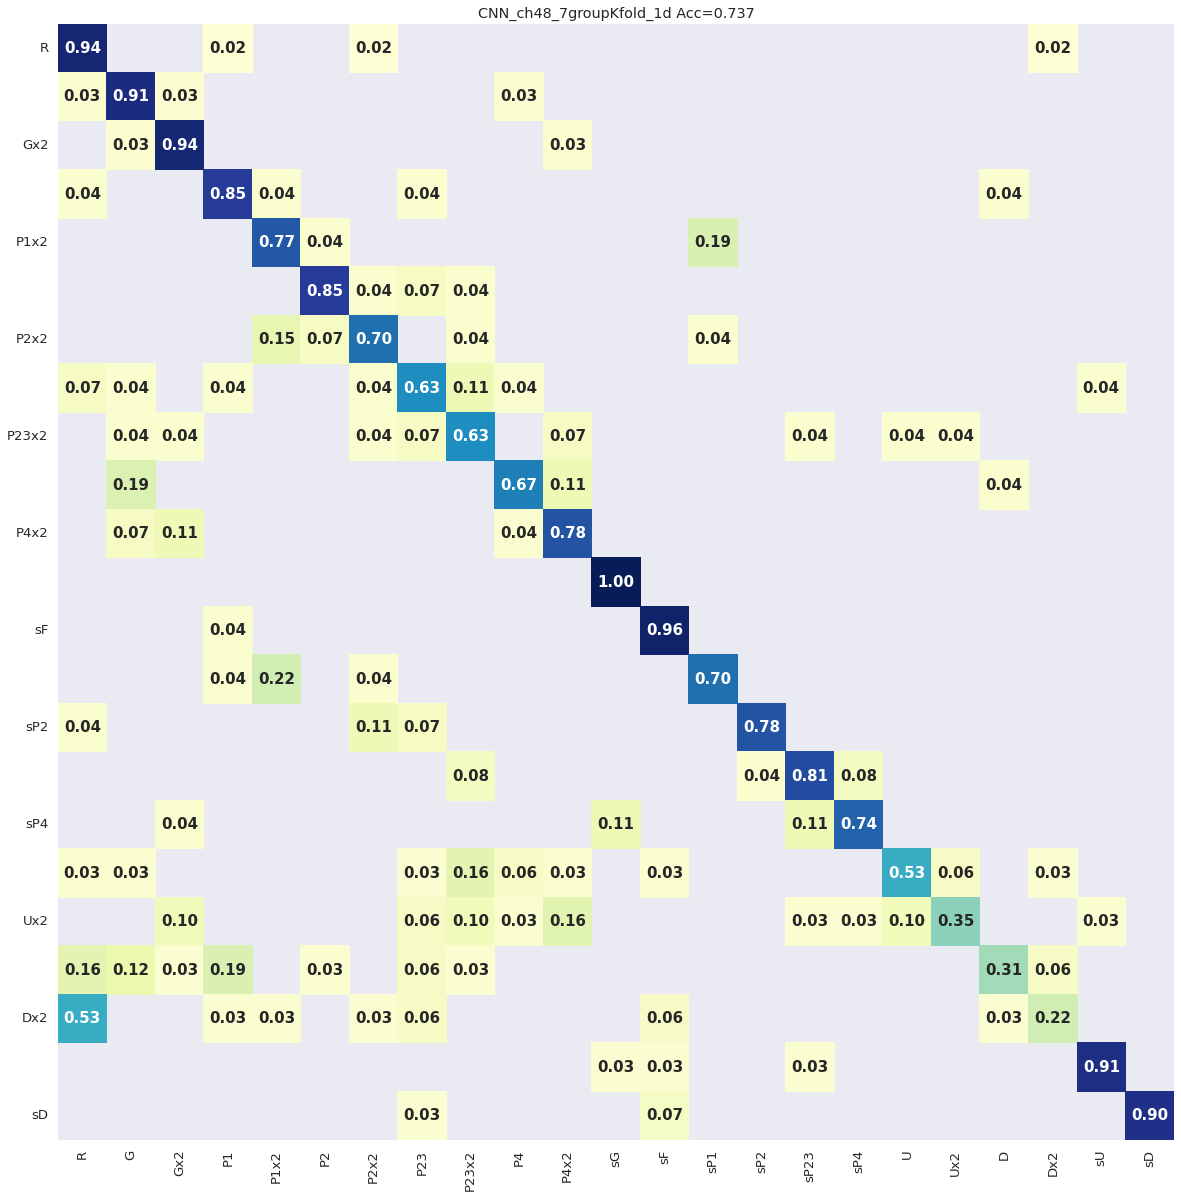

In [21]:

# only use one feature version to test   1D feature to test 
def main_CV1(ExpVer,m):
    file_name_data=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/data_all_multi6_filt_0.1_5.npz"
    data=np.load(file_name_data)


    feature_all=data['feature_all']
    label_all=data['label_all']
    caseNum_all=data['caseNum_all']

    
    opt1={'method':m,'net':'stft'}
    opt2={'method':m,'net':'stft2'}
    opt3={'method':m,'net':'cwt'}
    opt4={'method':m,'net':'1d'}


    opt_list=[opt4]

    channel=np.linspace(0,47,48).astype(int) 
    in_ch=48
    num_class=23
    k=7
    
    n_re=1
    cm=[]
    cm_norm=[]
    cm_all=[]
    acc=[]
    acc_all=[]
    y=[]
    test_ind_all=[]
    feature_list=[feature_all]
    feature_listName=["1d"]
    if __name__ == '__main__':
      
        i=0
  
        cm_norm_temp,cm_temp,cm_all_temp,acc_temp,acc_all_temp,y_temp,test_ind_all_temp=kFCV(feature_list[i][:,channel,:],label_all,in_ch,num_class,opt=opt_list[i],case=caseNum_all)
        print(feature_listName[i])
        cm_norm.append(cm_norm_temp)
        cm.append(cm_temp)
        cm_all.append(cm_all_temp)
        acc.append(acc_temp)
        acc_all.append(acc_all_temp)
        y.append(y_temp)
        test_ind_all.append(test_ind_all_temp)



   


    SaveName='ch48_'+str(k)+m
  
    model='CNN_'
    plotfigFullClass(cm_norm[0],acc[0],model+SaveName+'_1d',ExpVer)
 
    np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/result/CNN/npyFile/"+model+SaveName+"_1d.npz",\
                    cm_norm=cm_norm,cm=cm,cm_all=cm_all,acc=acc,acc_all=acc_all,y=y,test_ind_all=test_ind_all,\
                   )


ExpVer_list=['2_5','2_9','2_10','2_11','2_13','2_14','2_15','2_16','2_17']


m1='Kfold'
m2='groupKfold'
m3='group'

ExpVer_list=['2_5','2_9','2_10','2_11','2_13','2_14','2_15','2_17']  # multi_participant dataset per8 
#ExpVer_list=['2_1','2_16','2_19']   # sensor variation self -CV 


for i in range(8):
  main_CV1(ExpVer_list[i],m1)
  main_CV1(ExpVer_list[i],m2)

In [ ]:
# load saved tested results 

from google.colab import drive
drive.mount('/content/drive')
ExpVer='2_9'
data=np.load(r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/result/npyFile/"+"vit_ch48_group7fold_ensemble5.npz")
cm=data['cm']
acc_all=data['acc_all']
acc=data['acc']
print(acc)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: ignored

[0.93962264 0.9408805  0.93710692 0.93584906 0.94339623]
